In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.neighbors import KDTree
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
print(os.getcwd())
os.chdir("/content/gdrive/My Drive/Colab Notebooks/yelp_dataset")
print(os.getcwd())
df = pd.read_csv("merge_file.csv")
df
#We definitely need to filter out "is_open" for 1, but that feels like a tomorrow problem

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


FileNotFoundError: ignored

In [ ]:
df.columns

Index(['name_x', 'business_id', 'address_x', 'city_x', 'state_x',
       'postal_code_x', 'latitude_x', 'longitude_x', 'categories_x', 'stars_x',
       'review_count_x', 'attributes_x', 'hours_x', 'is_open_x',
       'cluster_id_x', 'latitude_norm', 'longitude_norm', 'stars_norm',
       'checkin_log_normalization', 'review_log_normalization',
       'checkin_date_count', 'chenckin_log_count', 'review_count_log'],
      dtype='object')

In [ ]:
#Creating a dictionary that has the counts of all the different categories found in the dataset
categories_list= []
categories_dict = {}
i = 0
for i in range(len(df)):
  new = df.categories_x.iloc[i]
  new = list(new.split(","))
  for n,s in enumerate(new):
    new[n] = s.strip()

  old = categories_list
  categories_list =  old + new

for c in range(len(categories_list)):
  categories_dict[categories_list[c]]= categories_list.count(categories_list[c])
#print(categories_dict)

#Sorting and take the top 20 (excluding food and restaurant)
sorted_categories = sorted(categories_dict.items(), key=lambda x:x[1], reverse= True)
sorted_categories
new_cols = []
for i in range(2,22):
  new_cols.append(sorted_categories[i][0])
new_cols

KeyboardInterrupt: ignored

In [ ]:
new_cols = []
for i in range(2,22):
  new_cols.append(sorted_categories[i][0])
new_cols

['Coffee & Tea',
 'Fast Food',
 'Sandwiches',
 'Burgers',
 'Seafood',
 'Breakfast & Brunch',
 'Nightlife',
 'Specialty Food',
 'Bars',
 'American (Traditional)',
 'Desserts',
 'Bakeries',
 'Ice Cream & Frozen Yogurt',
 'American (New)',
 'Beer',
 'Wine & Spirits',
 'Event Planning & Services',
 'Shopping',
 'Mexican',
 'Cafes']

In [ ]:
def bincol(string):
  tf = [string in i for i in df.categories_x]
  df[string] = tf
for string in new_cols:
  bincol(string)
  df[string] = df[string].astype(int)
df

,name_x,business_id,address_x,city_x,state_x,postal_code_x,latitude_x,longitude_x,categories_x,stars_x,...,Desserts,Bakeries,Ice Cream & Frozen Yogurt,American (New),Beer,Wine & Spirits,Event Planning & Services,Shopping,Mexican,Cafes
0,b'St Honore Pastries',MTSW4McQd7CbVtyjqoe9mw,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0,...,0,1,0,0,0,0,0,0,0,0
1,b'Perkiomen Valley Brewery',mWMc6_wTdE0EUBKIGXDVfA,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,"Brewpubs, Breweries, Food",4.5,...,0,0,0,0,0,0,0,0,0,0
2,b'Sonic Drive-In',CF33F8-E6oudUQ46HnavjQ,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",2.0,...,0,0,1,0,0,0,0,0,0,0
3,b'Sonic Drive-In',bBDDEgkFA1Otx9Lfe7BZUQ,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",1.5,...,0,0,1,0,0,0,0,0,0,0
4,b'Vietnamese Food Truck',eEOYSgkmpB90uNA7lDOMRA,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,"Vietnamese, Food, Restaurants, Food Trucks",4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,b'The Melting Pot - Nashville',2MAQeAqmD8enCT2ZYqUgIQ,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,"Fondue, Beer, Wine & Spirits, Food, Restaurants",4.0,...,0,0,0,0,1,1,0,0,0,0
31652,b'Wawa',l9eLGG9ZKpLJzboZq-9LRQ,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,"Restaurants, Sandwiches, Convenience Stores, C...",3.0,...,0,0,0,0,0,0,0,0,0,0
31653,b'Dutch Bros Coffee',cM6V90ExQD6KMSU3rRB5ZA,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",4.0,...,0,0,0,0,0,0,0,0,0,1
31654,b'Savaya Coffee Market',1jx1sfgjgVg0nM6n3p0xWA,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,"Specialty Food, Food, Coffee & Tea, Coffee Roa...",4.5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['name_x', 'business_id', 'address_x', 'city_x', 'state_x',
       'postal_code_x', 'latitude_x', 'longitude_x', 'categories_x', 'stars_x',
       'review_count_x', 'attributes_x', 'hours_x', 'is_open_x',
       'cluster_id_x', 'latitude_norm', 'longitude_norm', 'stars_norm',
       'checkin_log_normalization', 'review_log_normalization',
       'checkin_date_count', 'chenckin_log_count', 'review_count_log',
       'Coffee & Tea', 'Fast Food', 'Sandwiches', 'Burgers', 'Seafood',
       'Breakfast & Brunch', 'Nightlife', 'Specialty Food', 'Bars',
       'American (Traditional)', 'Desserts', 'Bakeries',
       'Ice Cream & Frozen Yogurt', 'American (New)', 'Beer', 'Wine & Spirits',
       'Event Planning & Services', 'Shopping', 'Mexican', 'Cafes'],
      dtype='object')

In [ ]:
#Only attributes included: Lat, long, stars, review count, top 20 categories
X = df[['latitude_norm', 'longitude_norm']]
X #Ensure everything is numeric

,latitude_norm,longitude_norm
0,0.532497,0.949567
1,0.595895,0.927227
2,-0.078153,0.108283
3,-0.088340,0.128834
4,-1.455596,0.433579
...,...,...
31651,-0.095667,0.128259
31652,0.527552,0.938628
31653,1.138836,-1.957277
31654,-0.717650,-1.579753


In [ ]:
from sklearn.neighbors import KDTree
#Build Tree
tree = KDTree(X)
print(tree)
#this runs really fast, I'm kinda concerned ngl

In [ ]:
s = pickle.dumps(tree)
tree_copy = pickle.loads(s)
dist, ind = tree_copy.query(X, k=11)

print(ind)  # indices of 5 closest neighbors
print(dist)  # distances to 3 closest neighbors

#Instead of one column with all similar, do 1st similar, 2nd similar, etc
# look at the distances and see what's up

[[    0 11147 10721 ... 28004 17012 12334]
 [    1 29493  6419 ... 23351 24529 21155]
 [    2 14225 28675 ... 26758 13464 26586]
 ...
 [31653 26777 10072 ...  7698 14318 27516]
 [31654 27823 20800 ... 31137  6371  6958]
 [31655 10283 31353 ... 18633 10336 18193]]
[[0.00000000e+00 2.24314661e-06 7.88892720e-06 ... 3.04571801e-05
  3.36444888e-05 4.41509376e-05]
 [0.00000000e+00 1.55657671e-03 1.56472997e-03 ... 7.79499673e-03
  8.49955165e-03 8.56835311e-03]
 [0.00000000e+00 2.27328212e-04 5.15333042e-04 ... 3.70263113e-03
  3.73369582e-03 4.61026351e-03]
 ...
 [0.00000000e+00 1.02254025e-04 1.02601205e-04 ... 5.26698429e-04
  5.38553370e-04 5.42303469e-04]
 [0.00000000e+00 2.24981732e-04 5.66439362e-04 ... 1.58429992e-03
  1.58679161e-03 1.75119686e-03]
 [0.00000000e+00 1.34178838e-05 3.97496083e-05 ... 5.61288105e-04
  5.99385757e-04 6.72149791e-04]]


In [ ]:
tops= pd.DataFrame(ind, columns = ["match","similar1","similar2","similar3", "similar4",'similar5', 'similar6', 'similar7', 'similar8', 'similar9', 'similar10'])
#It's at this point where we would want to map to the business ID
tops = tops.drop(['match'], axis=1)

def addcol(string):
  df[string] = tops[string]
for i in tops.columns:
  addcol(i)
df


,name_x,business_id,address_x,city_x,state_x,postal_code_x,latitude_x,longitude_x,categories_x,stars_x,...,similar1,similar2,similar3,similar4,similar5,similar6,similar7,similar8,similar9,similar10
0,b'St Honore Pastries',MTSW4McQd7CbVtyjqoe9mw,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0,...,11147,10721,1323,21893,13521,18203,8260,28004,17012,12334
1,b'Perkiomen Valley Brewery',mWMc6_wTdE0EUBKIGXDVfA,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,"Brewpubs, Breweries, Food",4.5,...,29493,6419,20188,28895,15626,22435,14938,23351,24529,21155
2,b'Sonic Drive-In',CF33F8-E6oudUQ46HnavjQ,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",2.0,...,14225,28675,12548,9284,4190,8182,22182,26758,13464,26586
3,b'Sonic Drive-In',bBDDEgkFA1Otx9Lfe7BZUQ,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",1.5,...,12957,6554,7443,15797,6939,2798,11694,10685,16666,1362
4,b'Vietnamese Food Truck',eEOYSgkmpB90uNA7lDOMRA,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,"Vietnamese, Food, Restaurants, Food Trucks",4.0,...,9108,20106,27873,20558,14532,24159,21708,2551,13622,18403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,b'The Melting Pot - Nashville',2MAQeAqmD8enCT2ZYqUgIQ,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,"Fondue, Beer, Wine & Spirits, Food, Restaurants",4.0,...,16338,22637,17992,14419,10402,12473,29119,29570,15073,7281
31652,b'Wawa',l9eLGG9ZKpLJzboZq-9LRQ,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,"Restaurants, Sandwiches, Convenience Stores, C...",3.0,...,12102,21535,27889,1211,18879,20378,17151,16898,29199,7946
31653,b'Dutch Bros Coffee',cM6V90ExQD6KMSU3rRB5ZA,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",4.0,...,26777,10072,3607,10079,20078,4145,7053,7698,14318,27516
31654,b'Savaya Coffee Market',1jx1sfgjgVg0nM6n3p0xWA,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,"Specialty Food, Food, Coffee & Tea, Coffee Roa...",4.5,...,27823,20800,22712,26498,24768,16829,24519,31137,6371,6958


In [ ]:
df.to_csv("similarsindex_onlylocation.csv")

Hey Kathy!! I changed the code above. Now the df dataframe has the similar businesses each in their own column. The numbers in those columns refer to the index of the business, not the businessID. I made it into a csv file so you don't have to waste time re-running code

In [ ]:
import pandas as pd

for i in range(1, 11):
    similar_col = 'similar' + str(i)
    row_nums = df[similar_col]
    business_ids = df.loc[row_nums, 'business_id'].reset_index(drop=True)
    new_col_name = similar_col + '_id'
    df[new_col_name] = business_ids

df


,name_x,business_id,address_x,city_x,state_x,postal_code_x,latitude_x,longitude_x,categories_x,stars_x,...,similar1_id,similar2_id,similar3_id,similar4_id,similar5_id,similar6_id,similar7_id,similar8_id,similar9_id,similar10_id
0,b'St Honore Pastries',MTSW4McQd7CbVtyjqoe9mw,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0,...,vP-qZ48IT3ceipA2vg0wNw,nk67HeBSnvys7foxtiANng,z5YxP_jyIU7dRKUA7V_H0w,GLSGyWYrl6t2TJl1ZS_tVg,6JeOgP-NpUedS4u5Iz3qlA,DO_op-iq4qoaOBEhJH6EdQ,T9C1od-JorSPXwXgzSqM9Q,y_H1AXgaFWV1EsetArescA,K1h1Cwy1VSGdjKuw-GM9Iw,bq0n3CQy1CkE_WUe76zQvg
1,b'Perkiomen Valley Brewery',mWMc6_wTdE0EUBKIGXDVfA,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,"Brewpubs, Breweries, Food",4.5,...,2bAMp7RVhArwR2bHTFlSiQ,4mYPqTpCjHqx8Ee4TIERXA,KmL7ZYTS5xvbnI5veNZ0uw,QG6yyZchEv9hj165TnL-kg,_yH3lqTAvfe8N5J7uI0J8g,EASb5k7y_w3fEaKEvpt1SQ,44lIDUakWjkGWTzGnEsVdw,stTwlR1KyBfsi2JiDgRRqA,jcwBfwL68BgGSlKf1t0yNA,uIxrAGLuztkQ2bYYS5Wk7Q
2,b'Sonic Drive-In',CF33F8-E6oudUQ46HnavjQ,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",2.0,...,U_x9aC9UabioGjJb9suzgQ,WOZcUWgeBEb5niZ08sj_6A,hjwblgY6usJNax7i2r1APg,ZdJgP7puNRex0Hy4PWIcAQ,EJPhcvVqYi6Y1dhDQXP-bQ,hmXAG0vhF6oWosfo0-eu-g,3-l_9-c5iabI-V3cnpUOsg,5XTdTRNeO33_9qHPDDtAag,LuhrYmlg-L9rYlju_kOGxg,KiMZcGGG0KovoSM8CJ9_kw
3,b'Sonic Drive-In',bBDDEgkFA1Otx9Lfe7BZUQ,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",1.5,...,L4POqDySd7lSnLPd8mmpiw,zaOhxcCakvXke6FQRcFg2w,b6NGQeURjEfpOxOuAxX-_Q,_5arUCK9zn1NegiZRxb6Rg,HApMtcUupWfHkCfab9XBcg,MYVWCT18urcDDPl7nJ5cFg,tX7fAS6C9vArD88yaPeqnw,w0sjGrU8zHgLgxbVyE5SBA,gylN_Qc6zXpgAwDQJXphIw,oiSVxgRNjdcdzKPOBIR6PQ
4,b'Vietnamese Food Truck',eEOYSgkmpB90uNA7lDOMRA,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,"Vietnamese, Food, Restaurants, Food Trucks",4.0,...,kJhoVi1nujLHrysPTQ2bvQ,EEG49pRkK7e8OVX28RIr_w,AxfB3gE1kWlRhcD5tGZY_A,miUImHz9y4eQp3Msy2f9og,sarzK-Xuoy2aQ5GZAQwKsw,_yk7klwrfUIX1qhaITV2nA,fuVjhIY099Xdla0x9qgyTA,4xSoCvHcFLoZW8tyxMqrpw,jOrXOU5FrC09BDAdBh0VDA,8UNGDhJUMRrPhzKq59bxwA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31651,b'The Melting Pot - Nashville',2MAQeAqmD8enCT2ZYqUgIQ,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,"Fondue, Beer, Wine & Spirits, Food, Restaurants",4.0,...,VuubVgCDC4rbvF_iPIhh1A,2VczMMo9tWBNPBEHMnoP5w,ZDY-jvetOMOE5BMM8e_BcQ,lJPQLm7RSENRuV21JWUepw,dTnDPYzYeOLgObQugBwO1A,6rTE6p18t3efMYDUKTyzQQ,PEW2AGp7oZSyZ6pGKWNqgg,uXKygoHoGly8OqINLCFbgQ,UlrEGYuRd5pxW0n4iCR9CQ,zRrxC7NDkgoDKN55Blcong
31652,b'Wawa',l9eLGG9ZKpLJzboZq-9LRQ,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,"Restaurants, Sandwiches, Convenience Stores, C...",3.0,...,uDsr1guHz4G8fBvrZHpoPA,UmrkBqWwGD8rFiYPoawmoA,eGYJDbjab4dUp8mg2dkOvQ,vFpbUcVAXxrSz5mFIzKbyw,e7Gz3lB7LwH-qTzUqqtZsA,5cpb23lEQ5brolyKRVBhgA,LcfXZV38PcTUEnZoM2vzXQ,2IgVBieBhTEmws0hxuNkhQ,nsZYVtv9l7Vyf9ZolUmYUw,gs_bPj-MhI4vwIVtr-6ZEQ
31653,b'Dutch Bros Coffee',cM6V90ExQD6KMSU3rRB5ZA,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",4.0,...,F3EULbdleUbnKumrzo-I2g,xYHkgePR2RY-QfDxU4nZAg,AUu9t9yMMkXmu0cLxOCUEA,wmH7YB7V6J3ZEli0aqAl_g,UedwUkX2R0yX8Fgj0cAPsw,JTHHrV0VO99HF7lfazZpOw,NKZl502pYc-l3DT32aoX7w,GxQqAlBts81cbP9h6rdluA,A6svWXAKjhWVzkZk5JFRqQ,WdZV2H3CmEiP-NWPT6WCEQ
31654,b'Savaya Coffee Market',1jx1sfgjgVg0nM6n3p0xWA,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,"Specialty Food, Food, Coffee & Tea, Coffee Roa...",4.5,...,r5TrH8oLwfUcniIwf1m7sQ,tN2YFUeWAYViTIBymlKEqw,C7JxWo4jFNWJzKt9sTIHHA,KnINy50lEEU1GIVC3nPF8Q,qaWM4T1eQoUMSRJ2AL2U1w,7WrnAUGyB_uyWBSk5imztg,MPvrpdF5kLX-tceVyvVTQA,o30cpvfgxHr6NQ5pvSb0Qw,JZczZovbS3ojyTMVAfiG1A,bLNSAljXE00oAcfGYJA-FA


In [ ]:
df.to_csv("similars_id_index_onlylocation.csv")

In [ ]:
np.random.choice(len(X), 10) #use as examples in report

array([16584, 13465, 14496,  1968, 17620, 18982, 23829, 20037, 32689,
       17659])

So now I need to convert the list values to business IDs, I bet this would be easier to do while in the data frame form?

In [ ]:
indvK

[11853, 406, 692, 9923]

In [ ]:
df.columns

RangeIndex(start=0, stop=5, step=1)

Next Steps:
- Convert indices to business IDs
- drop the first entry in every list
- make list into a column on the dataset
- Use the correct data

Visualize in map

In [ ]:
input_business = input("What is the target business' Yelp Business ID?")
target_location = df.loc[df['business_id'] == input_business, ['latitude_x', 'longitude_x']].values[0]


What is the target business' Yelp Business ID?1jx1sfgjgVg0nM6n3p0xWA


In [ ]:
target_location

array([  32.4095517, -110.9430727])

In [ ]:
similar_business= df.loc[df['business_id'] == input_business, 'similar_businesses'].values[0]
dic_location={'business_ids':similar_business, 'latitude':[], 'longitude':[]}
for i in range(len(similar_business)):
  location=df.loc[df['business_id']==similar_business[i], ['latitude_x','longitude_x']].values[0]
  dic_location["latitude"].append(similar_business[0])
  dic_location["longitude"].append(similar_business[1])


In [ ]:
# create a GeoDataFrame from longitude and latitude data
dic_location = {'name': ['location1', 'location2'],
'latitude': [39.955505 , 40.338183],
'longitude': [-75.155564, -75.471659]}
gdf = gpd.GeoDataFrame(dic_location, geometry=gpd.points_from_xy(dic_location.longitude, dic_location.latitude))

# plot the GeoDataFrame on top of the map background
gdf.to_crs(epsg=3857).plot(ax=ax, marker='o', color='red', markersize=100)
plt.show()
gdf = gpd.GeoDataFrame(dic_location, geometry=gpd.points_from_xy(dic_location.longitude, dic_location.latitude))

# set the CRS of the GeoDataFrame to EPSG:4326 (WGS 84)
gdf.crs = 'EPSG:4326'

# load a map background using contextily
ctx.providers.OpenStreetMap.Mapnik
ax = gdf.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=10)

# plot the GeoDataFrame on top of the map background
gdf.to_crs(epsg=3857).plot(ax=ax, marker='o', color='red', markersize=100)
plt.show()

AttributeError: ignored

In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 24.9 MB/s eta 0:00:00


In [ ]:

!pip install --upgrade geopandas
!pip install --upgrade matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
# Load the shapefile of the US boundary
us = gpd.read_file('/content/gdrive/My Drive/maps/cb_2019_us_state_20m.shp')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


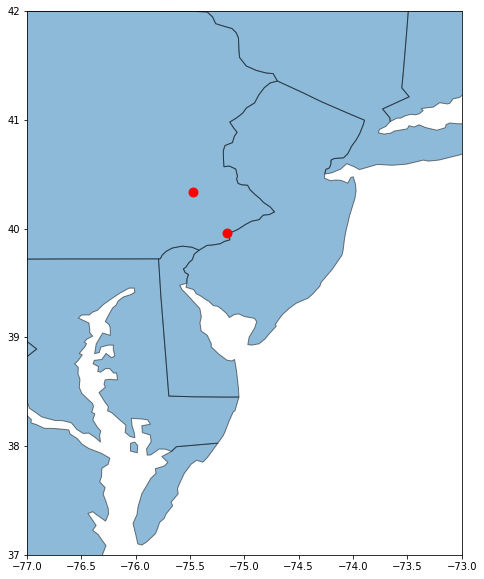

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
# Create a GeoDataFrame from the location data
data = {'name': ['location1', 'location2'],
        'latitude': [39.955505 , 40.338183],
        'longitude': [-75.155564, -75.471659]}
df1 = pd.DataFrame(data)
df1["Coordinates"] = list(zip(df1['longitude'], df1['latitude']))
df1.head()

# Convert the "Coordinates" column to Point objects
df1["Coordinates"] = df1["Coordinates"].apply(Point)

# Create a GeoDataFrame from the Pandas DataFrame
gdf = gpd.GeoDataFrame(df1, geometry="Coordinates")
gdf.head()

fig, ax = plt.subplots(figsize=(10,10))
us.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf.plot(ax=ax, marker='o', color='red', markersize=80)
ax.set_xlim([-77, -73])
ax.set_ylim([37, 42])
plt.show()

In [ ]:
!pip install --upgrade shapely

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
dic_location = {'name': ['location1', 'location2', 'location3'],
'latitude': [41.8781, 37.7749, 51.5074],
'longitude': [-87.6298, -122.4194, -0.1278]}

geometry = [Point(xy) for xy in zip(dic_location['longitude'], dic_location['latitude'])]

# Create a GeoDataFrame from the data
gdf = gpd.GeoDataFrame(dic_location, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.crs = "EPSG:4326"

# Plot the locations on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), alpha=0.5, edgecolor='k')
gdf.plot(ax=ax, color='red', markersize=50)
geometry = [Point(xy) for xy in zip(dic_location['longitude'], dic_location['latitude'])]

# Create a GeoDataFrame from the data and the Point objects
gdf = gpd.GeoDataFrame(dic_location, geometry=geometry)

# Plot the GeoDataFrame on a map
ax = gdf.plot(markersize=50, color='red')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-35be95812f94>", line 15, in <module>
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  File "/usr/local/lib/python3.9/dist-packages/geopandas/io/file.py", line 242, in _read_file
    engine = _check_engine(engine, "'read_file' function")
  File "/usr/local/lib/python3.9/dist-packages/geopandas/io/file.py", line 97, in _check_engine
    _import_fiona()
  File "/usr/local/lib/python3.9/dist-packages/geopandas/io/file.py", line 40, in _import_fiona
    import fiona
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 982, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 925, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1423, in find_spec
  File

OSError: ignored

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# create a GeoDataFrame from longitude and latitude data
data = pd.DataFrame({'name': ['location1', 'location2', 'location3'],
        'latitude': [41.8781, 37.7749, 51.5074],
        'longitude': [-87.6298, -122.4194, -0.1278]})
data["Coordinates"] = list(zip(df.longitude, df.latitude))
data.head()
data["Coordinates"] = df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(data, geometry="Coordinates")
gdf.head()



gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# set the CRS of the GeoDataFrame to EPSG:4326 (WGS 84)
gdf.crs = 'EPSG:4326'

# load a map background using contextily
ctx.providers.OpenStreetMap.Mapnik
ax = gdf.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=10, source=ctx.providers.OpenStreetMap.Mapnik)

# plot the GeoDataFrame on top of the map background
gdf.to_crs(epsg=3857).plot(ax=ax, marker='o', color='red', markersize=100)
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-74220915778e>", line 9, in <module>
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
AttributeError: 'dict' object has no attribute 'longitude'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_c

AttributeError: ignored

In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.9 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
!pip install --upgrade contextily
import matplotlib.pyplot as plt
import contextily as ctx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 36.9 MB/s eta 0:00:00
